# INM702 - Coursework TASK 1

## 1.1 Import required libraries for task

In [1]:
import numpy as np
import pandas as pd
import keras
from matplotlib import pyplot as plt

In [2]:
# Use keras to import MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## 1.2 Data inspection and preparation

Before procesing, we need to check the MNIST Data.
First we plot one sample image to see what our input data look like

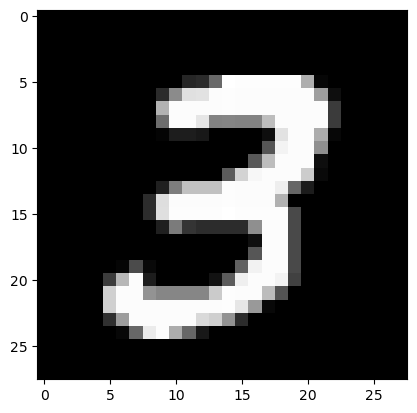

The number shown on image is: 3


In [3]:
# Plot a sample image
sample = 7
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
print("The number shown on image is:", y_train[sample])

Then we print the size of the arrays we have created just to make sure they are as expected

In [4]:
print ("shape of X_train {}".format(X_train.shape))
print ("shape of X_test {}".format(X_test.shape))
print ("shape of y_train {}".format(y_train.shape))
print ("shape of y_test {}".format(y_test.shape))

shape of X_train (60000, 28, 28)
shape of X_test (10000, 28, 28)
shape of y_train (60000,)
shape of y_test (10000,)


Finally we print one data sample to see what it is like

In [5]:
X_train[7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

We can see that our input is a 28x28 array of integers with values in the range 0 to 255. These correspond to the input image size which is 28x28 pixels and the values represent the colour intensity of each pixel in the image in the greyscale range. 0 is black, 255 is white and the values in between are shades of grey. This can also be confirmed by the image that we have plotted above.   

In order to feed the data into our NN we need to "flatten" the 28x28 array into one dimension array containing all 784 elements and preserving the total number of input samples. We print the resulting size.

In [6]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

print ("new shape of X_train {}".format(X_train.shape))
print ("new shape of X_test {}".format(X_test.shape))
X_train[7]

new shape of X_train (60000, 784)
new shape of X_test (10000, 784)


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  38,  43, 105, 255, 253,
       253, 253, 253, 253, 174,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 22

Since all our features are integer values that range from 0 to 255 it is not absolutely necessary to standardize our input data. However we will perform a simple scaling of the data by dividing all values by the max value 255

In [7]:
X_train = X_train/255
X_test = X_test/255
X_train[7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 2.1 Neural Network Implementation

In [8]:
import numpy as np

class MyNeuralNetwork:
    def __init__(self,input_size,hidden_sizes,output_size,activation_function,dropout):
        self.layer_sizes = [input_size] + hidden_sizes + [output_size] # Number of neurons in each layer
        self.activation_function = activation_function                 # Activation function to use
        self.dropout = dropout                                         # Dropout probability
        self.weights = []                                              # Weights for each layer
        self.biases = []                                               # Biases for each layer
        self.input_size = input_size                                   # Input size
        self.output_size = output_size                                 # Output size              
        self.hidden_sizes = hidden_sizes                               # Hidden layer sizes

        for i in range(len(self.layer_sizes) - 1):
            self.weights.append(np.random.uniform(-0.5, 0.5, (self.layer_sizes[i+1], self.layer_sizes[i])))
            self.biases.append(np.zeros((self.layer_sizes[i+1], 1)))

            #Debug: Print shapes
            print(f"Weights in layer : {i}, Weights shape: {self.weights[i].shape}, Biases shape: {self.biases[i].shape}")
    
    #Staticmethod is used to call the function without creating an object
    #In this way we can call them in the activation function and deactivation function
    @staticmethod  
    def ReLU(Z):
        return np.maximum(0,Z)
    
    @staticmethod
    def derivative_ReLU(Z):
        return Z > 0
    
    @staticmethod
    def sigmoid(Z):
        # Cap the values of Z within the range [-700, 700], to prevent overflow
        Z = np.clip(Z, -700, 700)
        return 1 / (1 + np.exp(-Z))
    
    @staticmethod
    def derivative_sigmoid(Z):
        return MyNeuralNetwork.sigmoid(Z) * (1 - MyNeuralNetwork.sigmoid(Z))
    
    @staticmethod
    def softmax(Z):
        Z_exp = np.exp(Z - np.max(Z, axis=0))
        sum_Z_exp = np.sum(Z_exp, axis=0)
        softmax_output = Z_exp / sum_Z_exp
        return softmax_output
        
    def one_hot(self,Y):
        num_classes = self.output_size
        one_hot = np.zeros((Y.size,num_classes))
        one_hot[np.arange(Y.size), Y] = 1
        return one_hot.T
        
    def activation(self,Z):
        if self.activation_function == 'relu':
            return self.ReLU(Z)
        elif self.activation_function == 'sigmoid':
            return self.sigmoid(Z)
        elif self.activation_function == 'softmax':
            return self.softmax(Z)
        else:
            raise Exception('Activation function not supported')
        
    def derivative_activation(self,A):
        if self.activation_function == 'relu':
            return self.derivative_ReLU(A)
        elif self.activation_function == 'sigmoid':
            return self.derivative_sigmoid(A)
        else:
            raise Exception('Activation function not supported')
        
    def calculate_loss(self,A3,Y):
        # Calculate the loss using the cross-entropy loss function
        #Calcuation should be based on y_pred and y_true

        y_pred = A3
        y_true = self.one_hot(Y)

        #Clip the y_prediction between epsilon and 1 - epsilon to prevent log(0) error
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

        #Calculate the loss as multi-class cross-entropy loss
        loss = - y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)
        loss = np.sum(loss) / Y.size

        return loss
        
    def forward_prop(self,X):
        # Forward propagation
        A = X.T
        layer_outputs = {}
        D = {} # Dropout mask matrices

        #Loop over each layer in the network
        for layer in range(len(self.layer_sizes)-1):
            # Compute the linear output Z for the current layer
            Z = self.weights[layer].dot(A) + self.biases[layer]

            #Check for the if not the last layer, and apply the activation function
            if (layer != len(self.layer_sizes) - 2 ):
                A = self.activation(Z)
                #Check for dropout and apply it accordingly 
                if self.dropout > 0: #apply dropout

                    '''

                    This line of code for dropout inspired from Andrew Ng's Deep Learning Specialization Course
                    https://www.youtube.com/watch?v=D8PJAL-MZv8
                    '''       

                    #Create a dropout mask matrix to be applied to a subset of neurons
                    D[layer] = np.random.rand(*A.shape) > self.dropout
                    #Apply the mask to A
                    A = A * D[layer]
                    #Normalize A to not to change expected value of A as keeping  probability
                    A = A / (1 - self.dropout)
                    
            #if there is no dropout
            else: #for the last layer use softmax activation function
                A = self.softmax(Z)
            layer_outputs[layer] = (A,Z)
            #Debuging: Print shapes
            #print(f"Forward Propagation, Layer: {layer}, A shape: {A.shape}, Z shape: {Z.shape}")
        
        return layer_outputs,D
    
    def backward_prop(self, X, Y, layer_outputs, D):

        m = X.shape[0]  # Number of training examples
        Y = self.one_hot(Y)  # One hot encode the labels
        gradients = {}  # Dictionary to store the gradients for each layer
        dZ = None 
        for layer in reversed(range(len(self.layer_sizes) - 1)): # Layers are backwardley calculate the gradients
            A, Z = layer_outputs[layer]                          # Get the layer's activations and linear outputs

            if layer == len(self.layer_sizes) - 2:  # Gradient for the last layer
                dZ = A - Y
                
            else:                                  # Gradient for the hidden layers
                dA = np.dot(self.weights[layer + 1].T, dZ)
                if self.dropout > 0:               # Apply dropout   
                    dA *= D[layer]
                dZ = dA * self.derivative_activation(Z)

            prev_A = layer_outputs[layer - 1][0] if layer != 0 else X.T     #If layer is not last one takes the previous layer's activation
                                                                            #If layers is last one takes the input X
            # Debugging: Print shapes
            #print(f" Backward_prop ,Layer: {layer}, prev_A shape: {prev_A.shape}, dZ.T shape: {dZ.T.shape}")

            #Calculate the gradients for each layer  and store them in gradients dictionary
            dW = np.dot(dZ, prev_A.T) / m
            db = np.sum(dZ, axis=1, keepdims=True) / m

            gradients[layer] = (dW, db)

        return gradients
          
    def update_gradient(self,gradients,learning_rate):
        # Update the weights and biases using gradient descent
        for layer in range(len(self.layer_sizes) - 1):  # Corrected here
            dW,db = gradients[layer]

            self.weights[layer] -= learning_rate * dW
            self.biases[layer] -= learning_rate * db
  
    def train(self,X,Y,learning_rate,epochs,batch_size,decay_rate,decay_step): 
        """
        Trains the neural network using the given training data.

        Parameters:
        self : MyNeuralNetwork
            The neural network object to train.
            

        X = numpy.ndarray
            The input data, wehere each row is a training example and each column is a feature.

        Y = numpy.ndarray
            The labels for each training example, where each row is a label. Must have the same number of rows as X.

        learning_rate : float
            The learning rate to use for weight updates in gradient descent.
        epochs : int
            The number of times to iterate over the entire training set.

        batch_size : int
            The number of training examples to split the training set into for mini-batch gradient descent.
        
        Returns:
        None
        """
        m = X.shape[0]
        losses = [] # Array to store the loss at each epoch
        accuracies = [] # Array to store the accuracy at each epoch
        learning_rate = learning_rate

        for epoch in range(epochs):
            epoch_loss = 0
            epoch_correct = 0

            #Applying the learning rate decay at specific steps
            if(epoch % decay_step == 0 and epochs != 0):
                learning_rate = learning_rate * (1.0/ (1.0 +decay_rate * epoch))

                #Print the new learning rate at each decay step
                print(f'The learning rate at epoch {epoch} is :{learning_rate}')

            #Shuffle the dataset at the start of each epoc
            permutation = np.random.permutation(m)
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]

            #Divide the the dataset into mini-bathces  
            for i in range(0,m - (m % batch_size),batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                Y_batch = Y_shuffled[i:i+batch_size]

                # Forward propagation
                layer_outpus,D = self.forward_prop(X_batch )

                # Calculate the loss and store it
                last_layer = len(self.layer_sizes) - 2
                loss = self.calculate_loss(layer_outpus[last_layer][0], Y_batch)
                epoch_loss += loss


                # Calculate the number of correct predictions
                predictions = np.argmax(layer_outpus[last_layer][0], axis=0)
                actuals = (Y_batch)
                epoch_correct += np.sum(predictions == actuals)
               
                # Backward propagation
                gradients=self.backward_prop(X_batch, Y_batch, layer_outpus,D)

                # Updating gradients
                self.update_gradient(gradients,learning_rate)

            #Calculate the average loss for this epoch and store it 
            average_epoch_loss = epoch_loss / (m // batch_size)
            average_epoch_accuracy = epoch_correct / (m)
            accuracies.append(average_epoch_accuracy)
            losses.append(average_epoch_loss)

            #Print the loss at each epoch with decimal point 5
            print(f'In  epoch  {epoch} loss  is : {average_epoch_loss:.5f} and accuracy is: {average_epoch_accuracy:.5f}')
            
        return losses,accuracies
            
    def predict(self,X):
        layer_outputs,_ = self.forward_prop(X)
        last_layer_acitvation = layer_outputs[len(self.layer_sizes) - 2][0]
        predictions = np.argmax(last_layer_acitvation, axis=0)
        return (last_layer_acitvation,predictions)

    def accuracy_score(self,X,Y):
        #The last layer of A3 is the probabilistic values of each class to calculate loss 
        last_layer_activation,predictions = self.predict(X)

        size = Y.size
                
        correct = np.sum(predictions == Y)
        accuracy = correct / size
        return last_layer_activation,accuracy

    def test(self,X,Y):
        last_layer_acitvation,accuracy = self.accuracy_score(X,Y)
        test_loss = self.calculate_loss(last_layer_acitvation, Y)
        
        return test_loss,accuracy                 

## 2.2 Network Evaluation for different Architectures

### 2.2.1 Simple Neural Network architecture (Perceptron) with Sigmoid

- Built with 1 hidden layer of 16 nodes
- Activation function used is 'Sigmoid' 
- No dropout applied 

- Number of epoch: 50 
- Mini batch size: 100
- Learning rate is initilized at 1 
- decay rate is 0.1 to decrease learning rate in steps in 10 (decay_step)

In [9]:
# Create a dictionary that contains all the loss and accuracy values for each model
test_results = {}

# Create a neural network object
nn1 = MyNeuralNetwork(input_size=784, hidden_sizes=[16], output_size=10, activation_function='sigmoid',dropout=0.0)

Weights in layer : 0, Weights shape: (16, 784), Biases shape: (16, 1)
Weights in layer : 1, Weights shape: (10, 16), Biases shape: (10, 1)


In [10]:
# Train the neural network
losses,accuracies = nn1.train(X_train, y_train, learning_rate=1, epochs=20, batch_size=64,decay_rate=0.1,decay_step=10)


The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 0.72825 and accuracy is: 0.86945
In  epoch  1 loss  is : 0.43198 and accuracy is: 0.92313
In  epoch  2 loss  is : 0.37883 and accuracy is: 0.93398
In  epoch  3 loss  is : 0.34572 and accuracy is: 0.94005
In  epoch  4 loss  is : 0.32295 and accuracy is: 0.94462
In  epoch  5 loss  is : 0.30589 and accuracy is: 0.94773
In  epoch  6 loss  is : 0.29170 and accuracy is: 0.95022
In  epoch  7 loss  is : 0.28211 and accuracy is: 0.95102
In  epoch  8 loss  is : 0.26992 and accuracy is: 0.95303
In  epoch  9 loss  is : 0.26151 and accuracy is: 0.95480
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 0.23396 and accuracy is: 0.95992
In  epoch  11 loss  is : 0.22908 and accuracy is: 0.96167
In  epoch  12 loss  is : 0.22555 and accuracy is: 0.96158
In  epoch  13 loss  is : 0.22200 and accuracy is: 0.96175
In  epoch  14 loss  is : 0.21827 and accuracy is: 0.96250
In  epoch  15 loss  is : 0.21617 and accuracy is: 0.96313
In  epo

In [11]:
# Test the neural network
loss,acc = nn1.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')

test_results['nn1'] = {'loss':losses,'accuracy':accuracies}

Test Loss: 0.27938028073398574, Test Accuracy: 0.9526


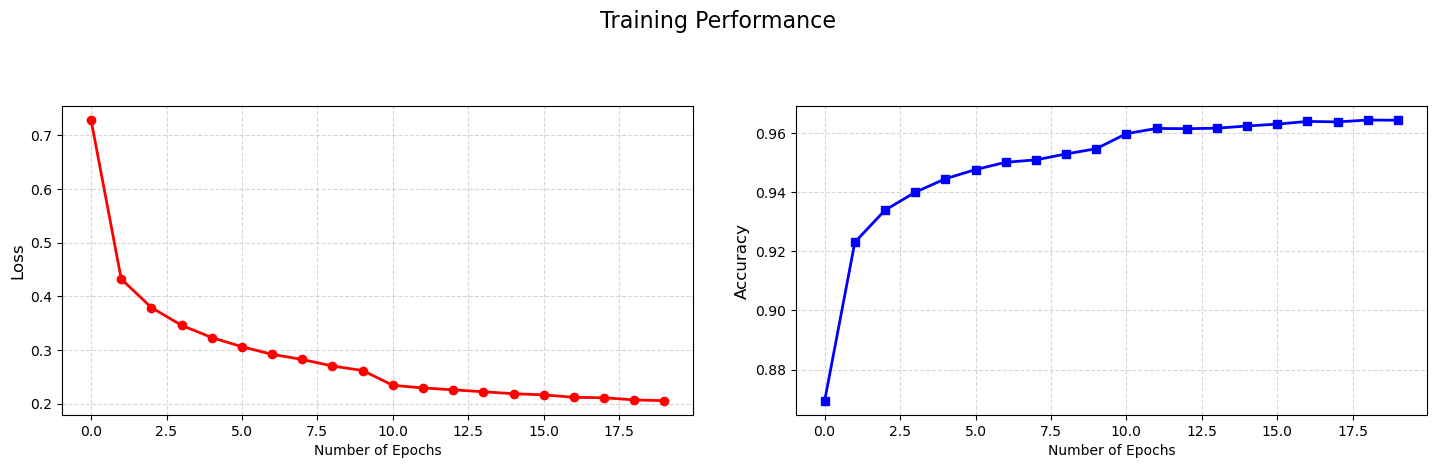

In [12]:
#Plot the loss and accuracy curves for the training process 
#Show it next to each other in the same figure

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

### 2.2.2 Simple Neural Network architecture (Perceptron) with ReLU

- Built with 1 hidden layer of 16 nodes
- Activation function used is 'ReLU' 
- No dropout applied 

- Number of epoch: 50 
- Mini batch size: 100
- Learning rate is initilized at 1 
- decay rate is 0.1 to decrease learning rate in steps in 10 (decay_step)

In [13]:
# Create a neural network object
nn2 = MyNeuralNetwork(input_size=784, hidden_sizes=[16], output_size=10, activation_function='relu',dropout=0.0)

Weights in layer : 0, Weights shape: (16, 784), Biases shape: (16, 1)
Weights in layer : 1, Weights shape: (10, 16), Biases shape: (10, 1)


In [14]:
# Train the neural network
losses,accuracies = nn2.train(X_train, y_train, learning_rate=1, epochs=20, batch_size=64,decay_rate=0.1,decay_step=10)

The learning rate at epoch 0 is :1.0
In  epoch  0 loss  is : 0.99829 and accuracy is: 0.80807
In  epoch  1 loss  is : 0.60529 and accuracy is: 0.89633
In  epoch  2 loss  is : 0.51686 and accuracy is: 0.91173
In  epoch  3 loss  is : 0.46391 and accuracy is: 0.92210
In  epoch  4 loss  is : 0.42778 and accuracy is: 0.92775
In  epoch  5 loss  is : 0.40085 and accuracy is: 0.93275
In  epoch  6 loss  is : 0.38675 and accuracy is: 0.93527
In  epoch  7 loss  is : 0.38120 and accuracy is: 0.93545
In  epoch  8 loss  is : 0.37620 and accuracy is: 0.93643
In  epoch  9 loss  is : 0.36783 and accuracy is: 0.93777
The learning rate at epoch 10 is :0.5
In  epoch  10 loss  is : 0.28514 and accuracy is: 0.95142
In  epoch  11 loss  is : 0.27632 and accuracy is: 0.95223
In  epoch  12 loss  is : 0.26953 and accuracy is: 0.95367
In  epoch  13 loss  is : 0.26492 and accuracy is: 0.95360
In  epoch  14 loss  is : 0.26207 and accuracy is: 0.95388
In  epoch  15 loss  is : 0.25877 and accuracy is: 0.95458
In  epo

In [15]:
# Test the neural network
loss,acc = nn2.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
test_results['nn2'] = {'loss':losses,'accuracy':accuracies}

Test Loss: 0.31914207586111853, Test Accuracy: 0.947


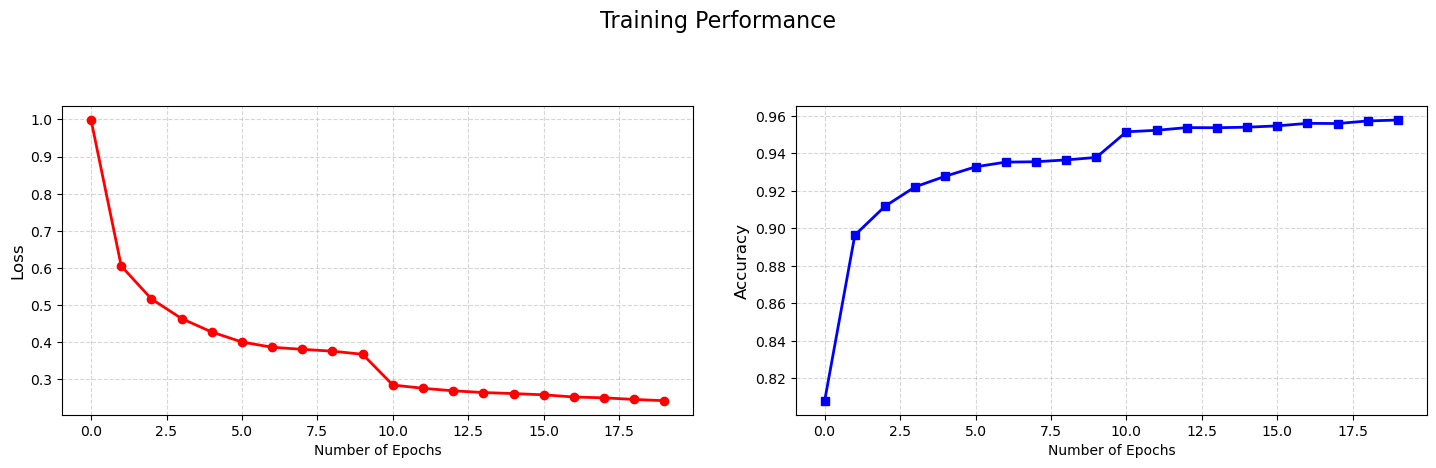

In [16]:
#Plot the loss and accuracy curves for the training process 
#Show it next to each other in the same figure

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

### 2.2.3 Complex Architecutre with Relu Activation function with different learning rate and decay rate

- Built with 3 hidden layer of 128,64,32  nodes
- Activation function used is 'ReLU' 
- No dropout applied 

- Number of epoch: 20 
- Mini batch size: 16 
- Learning rate is initilized at 0.01 
- decay rate is 0.01 to decrease learning rate in steps in 10 (decay_step)

In [17]:
nn3 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64,32], output_size=10, activation_function='relu',dropout=0.0)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (64, 128), Biases shape: (64, 1)
Weights in layer : 2, Weights shape: (32, 64), Biases shape: (32, 1)
Weights in layer : 3, Weights shape: (10, 32), Biases shape: (10, 1)


In [18]:
# Train the neural network
# Batch sizes, decay rate and learning rate changed !! 
losses,accuracies = nn3.train(X_train, y_train, learning_rate=0.01, epochs=20, batch_size=16,decay_rate=0.01,decay_step=10)



The learning rate at epoch 0 is :0.01


In  epoch  0 loss  is : 1.04138 and accuracy is: 0.79985
In  epoch  1 loss  is : 0.52828 and accuracy is: 0.90330
In  epoch  2 loss  is : 0.41863 and accuracy is: 0.92478
In  epoch  3 loss  is : 0.35765 and accuracy is: 0.93670
In  epoch  4 loss  is : 0.31753 and accuracy is: 0.94383
In  epoch  5 loss  is : 0.28524 and accuracy is: 0.94900
In  epoch  6 loss  is : 0.26178 and accuracy is: 0.95380
In  epoch  7 loss  is : 0.24125 and accuracy is: 0.95817
In  epoch  8 loss  is : 0.22445 and accuracy is: 0.96050
In  epoch  9 loss  is : 0.20871 and accuracy is: 0.96337
The learning rate at epoch 10 is :0.00909090909090909
In  epoch  10 loss  is : 0.19367 and accuracy is: 0.96613
In  epoch  11 loss  is : 0.18415 and accuracy is: 0.96817
In  epoch  12 loss  is : 0.17227 and accuracy is: 0.96982
In  epoch  13 loss  is : 0.16264 and accuracy is: 0.97165
In  epoch  14 loss  is : 0.15543 and accuracy is: 0.97323
In  epoch  15 loss  is : 0.14444 and accuracy is: 0.97565
In  epoch  16 loss  is : 0.1

In [19]:
# Test the neural network
loss,acc = nn3.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
test_results['nn3'] = {'loss':losses,'accuracy':accuracies}



Test Loss: 0.27124385857406924, Test Accuracy: 0.9575


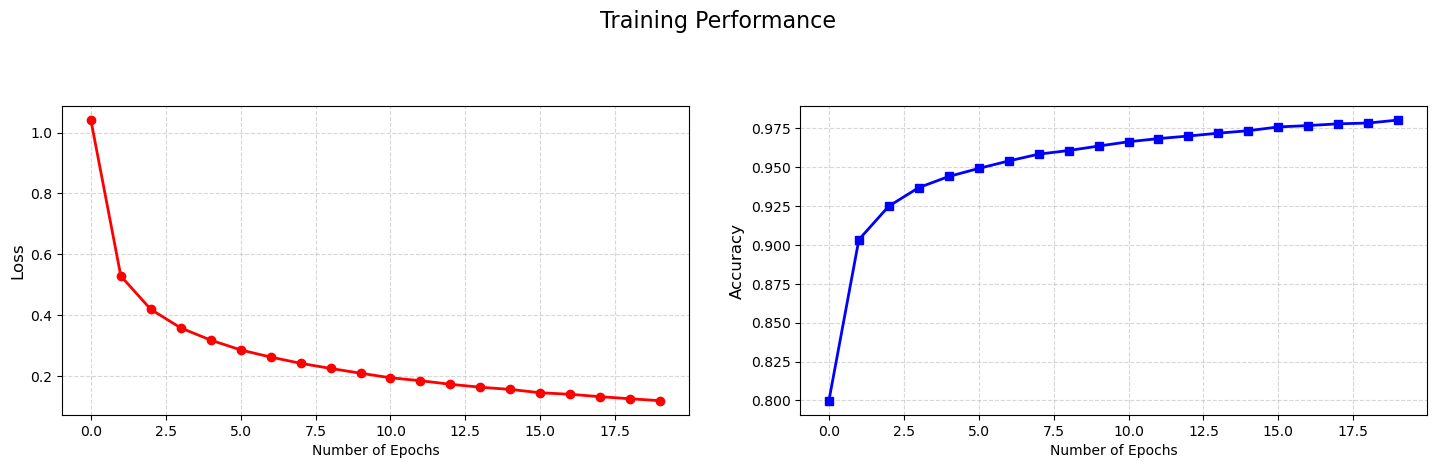

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

### 2.2.4 Complex Architecture with ReLU activation with Dropout 

In [21]:
nn4 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64,32], output_size=10, activation_function='relu',dropout=0.4)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (64, 128), Biases shape: (64, 1)
Weights in layer : 2, Weights shape: (32, 64), Biases shape: (32, 1)
Weights in layer : 3, Weights shape: (10, 32), Biases shape: (10, 1)


In [22]:
# Train the neural network
# Batch sizes, decay rate and learning rate changed !! 
losses,accuracies = nn4.train(X_train, y_train, learning_rate=0.01, epochs=20, batch_size=16,decay_rate=0.01,decay_step=10)

The learning rate at epoch 0 is :0.01


In  epoch  0 loss  is : 3.43380 and accuracy is: 0.17677
In  epoch  1 loss  is : 2.93473 and accuracy is: 0.26188
In  epoch  2 loss  is : 2.68480 and accuracy is: 0.33720
In  epoch  3 loss  is : 2.47955 and accuracy is: 0.40018
In  epoch  4 loss  is : 2.29166 and accuracy is: 0.45170
In  epoch  5 loss  is : 2.14339 and accuracy is: 0.49748
In  epoch  6 loss  is : 2.03065 and accuracy is: 0.52770
In  epoch  7 loss  is : 1.92197 and accuracy is: 0.56075
In  epoch  8 loss  is : 1.83092 and accuracy is: 0.58587
In  epoch  9 loss  is : 1.74891 and accuracy is: 0.60935
The learning rate at epoch 10 is :0.00909090909090909
In  epoch  10 loss  is : 1.68965 and accuracy is: 0.62753
In  epoch  11 loss  is : 1.65169 and accuracy is: 0.63983
In  epoch  12 loss  is : 1.60248 and accuracy is: 0.65563
In  epoch  13 loss  is : 1.55308 and accuracy is: 0.67053
In  epoch  14 loss  is : 1.51799 and accuracy is: 0.67962
In  epoch  15 loss  is : 1.47765 and accuracy is: 0.69223
In  epoch  16 loss  is : 1.4

In [23]:
# Test the neural network
loss,acc = nn4.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
test_results['nn4'] = {'loss':losses,'accuracy':accuracies}

Test Loss: 1.2946052584352248, Test Accuracy: 0.7457


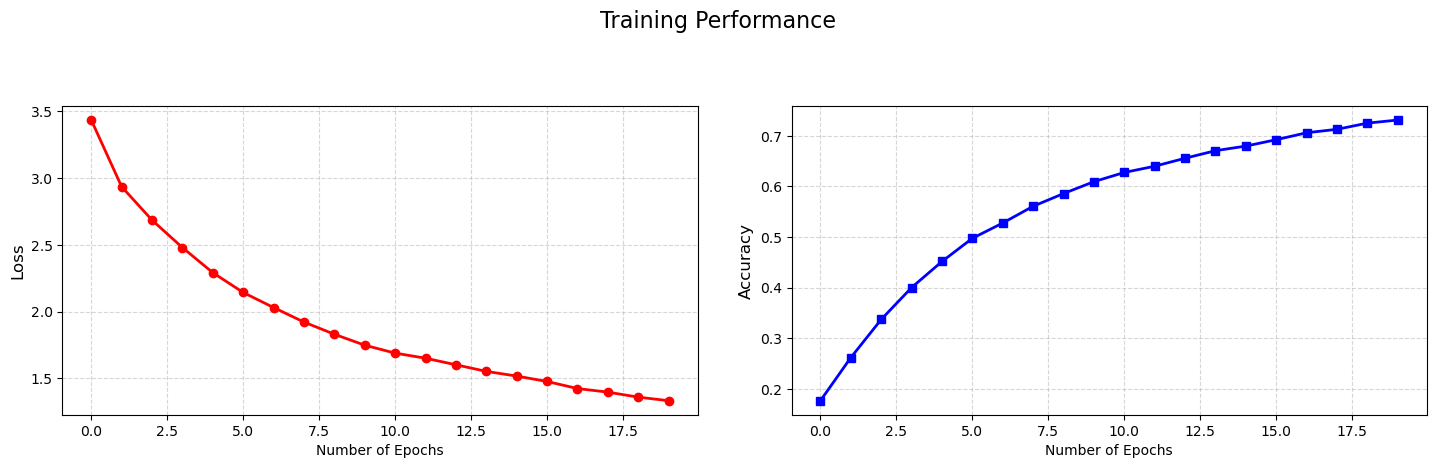

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

### 2.2.5 Complex Architecture with ReLU,dropout and SGD optimizer

In [25]:
nn5 = MyNeuralNetwork(input_size=784, hidden_sizes=[128,64,32], output_size=10, activation_function='relu',dropout=0.3)

Weights in layer : 0, Weights shape: (128, 784), Biases shape: (128, 1)
Weights in layer : 1, Weights shape: (64, 128), Biases shape: (64, 1)
Weights in layer : 2, Weights shape: (32, 64), Biases shape: (32, 1)
Weights in layer : 3, Weights shape: (10, 32), Biases shape: (10, 1)


In [26]:
# Train the neural network
# Batch sizes, decay rate and learning rate changed !! 
losses,accuracies = nn5.train(X_train, y_train, learning_rate=0.01, epochs=10, batch_size=1,decay_rate=0.01,decay_step=10)

The learning rate at epoch 0 is :0.01


In  epoch  0 loss  is : 2.13125 and accuracy is: 0.51535
In  epoch  1 loss  is : 1.05961 and accuracy is: 0.80787
In  epoch  2 loss  is : 0.79396 and accuracy is: 0.86497
In  epoch  3 loss  is : 0.67632 and accuracy is: 0.88928
In  epoch  4 loss  is : 0.59991 and accuracy is: 0.90317
In  epoch  5 loss  is : 0.54925 and accuracy is: 0.91247
In  epoch  6 loss  is : 0.49790 and accuracy is: 0.92085
In  epoch  7 loss  is : 0.46301 and accuracy is: 0.92550
In  epoch  8 loss  is : 0.45346 and accuracy is: 0.92828
In  epoch  9 loss  is : 0.42730 and accuracy is: 0.93302


In [27]:
# Test the neural network
loss,acc = nn5.test(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')
test_results['nn5'] = {'loss':losses,'accuracy':accuracies}

Test Loss: 0.4533912470717704, Test Accuracy: 0.9292


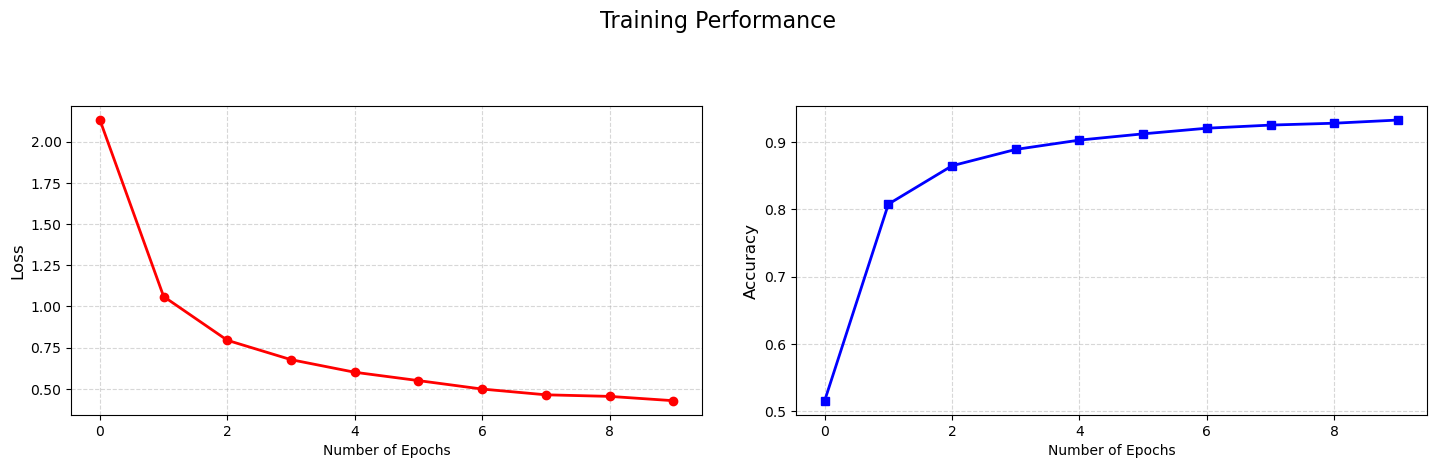

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Performance', fontsize=16)
ax1.plot(losses, color='red', marker='o', linestyle='-', linewidth=2, markersize=6)
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Loss', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)
ax2.plot(accuracies, color='blue', marker='s', linestyle='-', linewidth=2, markersize=6)
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Accuracy', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)
# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()